In [1]:
import pandas as pd
import pandas as pd

from connect import connect

In [2]:
#Conectarse a la base de datos
engine = connect()

# CASE
Aplicar condicionales en la búsqueda 

In [19]:
QUERY = """
SELECT
    *,
CASE WHEN rating > 3 THEN "Alto rating"
ELSE "Bajo rating"
END AS type_of_rating
    
FROM 
     ratings
"""




In [21]:
data = pd.read_sql_query(QUERY, con=engine)

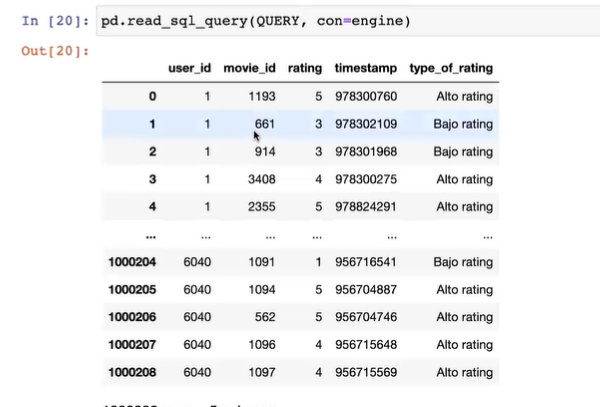

In [22]:
data

,user_id,movie_id,rating,timestamp,type_of_rating
0,1,1193,5,978300760,Alto rating
1,1,661,3,978302109,Bajo rating
2,1,914,3,978301968,Bajo rating
3,1,3408,4,978300275,Alto rating
4,1,2355,5,978824291,Alto rating
...,...,...,...,...,...
1000204,6040,1091,1,956716541,Bajo rating
1000205,6040,1094,5,956704887,Alto rating
1000206,6040,562,5,956704746,Alto rating
1000207,6040,1096,4,956715648,Alto rating


# Alias
Es útil cuando el nombre de la columna es demasiado largo o algo parecido, por eso se le pone un nuevo alias a la columna

In [27]:
QUERY = """
SELECT
    movie_id AS id, title AS titulo, genres
FROM 
    movies
"""

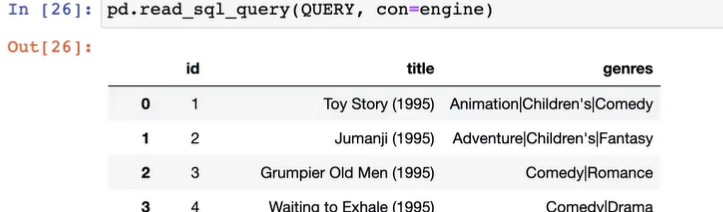

In [28]:
pd.read_sql_query(QUERY, con=engine)

,id,titulo,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [36]:
QUERY = """
SELECT 
    m.movie_id, m.title
FROM
    movies AS m
"""

In [37]:
pd.read_sql_query(QUERY, con=engine)

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
3877,3948,Meet the Parents (2000)
3878,3949,Requiem for a Dream (2000)
3879,3950,Tigerland (2000)
3880,3951,Two Family House (2000)


# Comentarios

In [53]:
QUERY = """
-- Esto es un comentario
SELECT
    *
FROM
    users
    
/*
El resultado de esta query
son las columnas:

user_id
gender
age
occupation
cp

*/
    
"""



In [54]:
pd.read_sql_query(QUERY, con=engine)

,user_id,gender,age,occupation,cp
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


# Ordenar

In [59]:
QUERY = """
SELECT
   *
FROM
    users
ORDER BY age ASC
"""

In [60]:
pd.read_sql_query(QUERY, con=engine)

,user_id,gender,age,occupation,cp
0,5459,F,1,10,99016
1,5514,F,1,10,76501
2,5524,F,1,10,26505
3,5525,F,1,10,55311
4,5555,M,1,10,37830
...,...,...,...,...,...
6035,5363,M,56,13,30673
6036,5398,M,56,17,71301
6037,5431,M,56,1,19026
6038,5432,M,56,13,01742


# Count AVG SUM MAX MIN DISTINCT

In [65]:
QUERY = """
SELECT
    AVG(rating) AS mean_rating
FROM
    ratings
"""

In [66]:
pd.read_sql_query(QUERY, con=engine)

,mean_rating
0,3.5816


In [69]:
QUERY = """
SELECT
    SUM(rating) AS sum_rating
FROM
    ratings
"""

In [70]:
pd.read_sql_query(QUERY, con=engine)

,sum_rating
0,3582313.0


In [89]:
QUERY = """
SELECT
    COUNT(DISTINCT(user_id)) AS unique_users,
    COUNT(DISTINCT(movie_id)) AS unique_movies
FROM
    ratings
WHERE rating < 2
"""

In [90]:
pd.read_sql_query(QUERY, con=engine)

,unique_users,unique_movies
0,4667,3274


In [109]:
QUERY = """
SELECT
    MIN(rating) as min_rating,
    MAX(rating) as max_rating
FROM
    ratings
WHERE user_id = 4
"""

In [110]:
pd.read_sql_query(QUERY, con=engine)

,min_rating,max_rating
0,1,5


# Groupby

In [116]:
QUERY = """
SELECT 
    user_id, 
    AVG(rating) AS user_mean_rating,
    MAX(rating) AS user_max_rating,
    MIN(rating) AS user_min_rating
FROM
    ratings
    
GROUP BY user_id
    
"""
pd.read_sql_query(QUERY, con=engine)

,user_id,user_mean_rating,user_max_rating,user_min_rating
0,1,4.1887,5,3
1,2,3.7132,5,1
2,3,3.9020,5,1
3,4,4.1905,5,1
4,5,3.1465,5,1
...,...,...,...,...
6035,6036,3.3029,5,1
6036,6037,3.7178,5,1
6037,6038,3.8000,5,1
6038,6039,3.8780,5,2


In [125]:
QUERY = """
SELECT 
    movie_id, 
    AVG(rating) AS movie_mean_rating,
    MAX(rating) AS movie_max_rating,
    MIN(rating) AS movie_min_rating
FROM
    ratings
    
GROUP BY movie_id
ORDER BY movie_mean_rating ASC
"""
pd.read_sql_query(QUERY, con=engine)

,movie_id,movie_mean_rating,movie_max_rating,movie_min_rating
0,1311,1.0,1,1
1,826,1.0,1,1
2,3651,1.0,1,1
3,1165,1.0,1,1
4,3209,1.0,1,1
...,...,...,...,...
3701,3233,5.0,5,5
3702,3172,5.0,5,5
3703,3656,5.0,5,5
3704,3382,5.0,5,5


# Having

In [131]:
QUERY = """
SELECT 
    user_id, 
    AVG(rating) AS user_mean_rating,
    MAX(rating) AS user_max_rating,
    MIN(rating) AS user_min_rating
FROM
    ratings
    
GROUP BY user_id
    
HAVING user_mean_rating > 4
"""
pd.read_sql_query(QUERY, con=engine)

,user_id,user_mean_rating,user_max_rating,user_min_rating
0,1,4.1887,5,3
1,4,4.1905,5,1
2,7,4.3226,5,3
3,10,4.1147,5,2
4,17,4.0758,5,2
...,...,...,...,...
1450,6020,4.3953,5,3
1451,6024,4.1263,5,3
1452,6027,4.2500,5,2
1453,6032,4.1346,5,1


# Subquery
    Un Subquery es una consulta anidada

In [133]:
QUERY = """
SELECT
    AVG(rating)
FROM 
    ratings


"""
pd.read_sql_query(QUERY, con=engine)

,AVG(rating)
0,3.5816


In [134]:
QUERY = """
SELECT
    *
FROM 
    ratings
WHERE rating > 3.5816

"""
pd.read_sql_query(QUERY, con=engine)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,3408,4,978300275
2,1,2355,5,978824291
3,1,1287,5,978302039
4,1,2804,5,978300719
...,...,...,...,...
575276,6040,1089,4,956704996
575277,6040,1094,5,956704887
575278,6040,562,5,956704746
575279,6040,1096,4,956715648


In [135]:
QUERY = """
SELECT
    *
FROM 
    ratings
WHERE rating > 

    (SELECT
        AVG(rating)
   FROM 
        ratings)

"""
pd.read_sql_query(QUERY, con=engine)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,3408,4,978300275
2,1,2355,5,978824291
3,1,1287,5,978302039
4,1,2804,5,978300719
...,...,...,...,...
575276,6040,1089,4,956704996
575277,6040,1094,5,956704887
575278,6040,562,5,956704746
575279,6040,1096,4,956715648


In [140]:
QUERY = """
SELECT
    *
FROM
    ratings
WHERE user_id in


    (SELECT
        user_id
    FROM
        users
    WHERE occupation IN (10,7,6))
"""
pd.read_sql_query(QUERY, con=engine)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
165915,6040,1091,1,956716541
165916,6040,1094,5,956704887
165917,6040,562,5,956704746
165918,6040,1096,4,956715648


# Subquery correlacionada


In [143]:
QUERY = """
SELECT
    user_id, 
    gender,
    occupation,
    (
       SELECT
          COUNT(movie_id)
       FROM
           ratings
       WHERE
           users.user_id = ratings.user_id
    )
    
FROM

    users
LIMIT 100


"""
pd.read_sql_query(QUERY, con=engine)

,user_id,gender,occupation,(\n SELECT\n COUNT(movie_id)\n FROM\n ratings\n WHERE\n users.user_id = ratings.user_id\n )
0,1,F,10,53
1,2,M,16,129
2,3,M,15,51
3,4,M,7,21
4,5,M,20,198
...,...,...,...,...
95,96,F,16,81
96,97,F,3,154
97,98,F,7,20
98,99,F,10,107


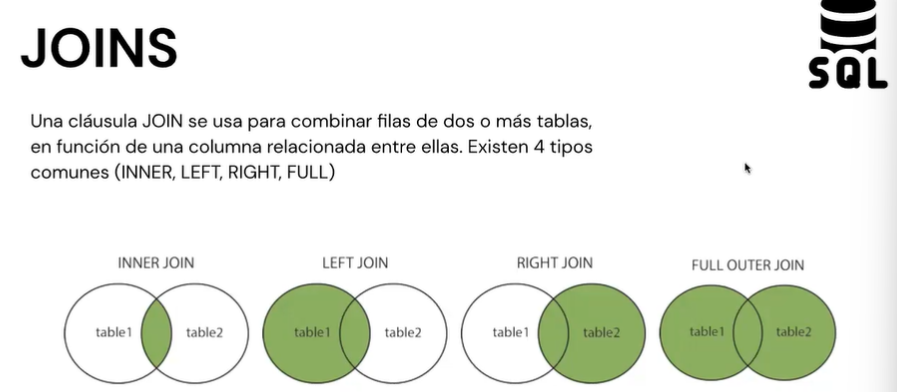

# Joins

In [145]:
QUERY = """
SELECT 
    *
FROM 
    ratings
LEFT JOIN 
    movies USING(movie_id)
"""
pd.read_sql_query(QUERY, con=engine)

,movie_id,user_id,rating,timestamp,title,genres
0,1193,1,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,661,1,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,914,1,3,978301968,My Fair Lady (1964),Musical|Romance
3,3408,1,4,978300275,Erin Brockovich (2000),Drama
4,2355,1,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...
1000204,3671,6040,4,997454367,Blazing Saddles (1974),Comedy|Western
1000205,3683,6040,4,960971696,Blood Simple (1984),Drama|Film-Noir
1000206,3703,6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),Action|Sci-Fi
1000207,3735,6040,4,960971654,Serpico (1973),Crime|Drama
